<a href="https://colab.research.google.com/github/9bishal/TensorFlow_Project/blob/main/Working_with_large_dats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###The large Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["sex"], insurance["smoker"] , insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
#let's try one-hot encoding our dataframe so it's all number
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot = insurance_one_hot.astype(int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


###Let's Build a Model

In [5]:
#Creating  X and Y values(features and labels)
x=insurance_one_hot.drop("charges", axis=1)
y=insurance_one_hot["charges"]
y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [6]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [7]:
#Creating training and  test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)# 0.2 mean 20% of the total data i.e. 0.2*1338=267.6
len(x),len(x_train), len(y), len(y_train), len(x_test), len(y_test)

(1338, 1070, 1338, 1070, 268, 268)

In [8]:
import numpy as np

# Convert to NumPy arrays if not already
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [9]:
print("x_train shape:", x_train.shape)  # Should be (number_of_samples, 1) for 1D data
print("y_train shape:", y_train.shape)  # Should be (number_of_samples,)


x_train shape: (1070, 11)
y_train shape: (1070,)


In [10]:
#Building the neural networks data (sort like model_1 as of the previous one)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation='relu'),  # input shape should match x_train (11 features)
    tf.keras.layers.Dense(1)  # Output layer (e.g., for regression, it could be a single value)
])

#2. Comiple the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
insurance_model.fit(x_train, y_train, epochs=100, verbose=1)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 10686.1445 - mae: 10686.1445
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7555.1919 - mae: 7555.1919
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7962.8062 - mae: 7962.8062
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7363.7920 - mae: 7363.7920
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7410.3960 - mae: 7410.3960
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7638.7378 - mae: 7638.7378
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7710.0391 - mae: 7710.0391
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7853.6865 - mae: 7853.6865
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7645.3071 - mae: 7645.3071
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7599.4702 - mae: 7599.4702
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7601.5894 - mae: 7601.5894
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/s

In [12]:
y_preds=insurance_model.predict(x_test)
y_preds

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[10621.038 ],
       [ 7040.9067],
       [17975.455 ],
       [11088.693 ],
       [ 5856.996 ],
       [ 6423.1826],
       [ 2687.5442],
       [14056.472 ],
       [ 5205.245 ],
       [11835.326 ],
       [10211.191 ],
       [ 9177.039 ],
       [ 5844.709 ],
       [14484.375 ],
       [16592.697 ],
       [14270.064 ],
       [11448.707 ],
       [14004.771 ],
       [10320.519 ],
       [12463.319 ],
       [ 6444.202 ],
       [ 9452.795 ],
       [ 2117.991 ],
       [ 3331.0322],
       [12336.522 ],
       [11825.716 ],
       [13050.466 ],
       [ 6272.2104],
       [11132.398 ],
       [ 2173.8652],
       [10007.308 ],
       [12539.438 ],
       [ 3145.6052],
       [ 7209.316 ],
       [ 4486.585 ],
       [ 9129.421 ],
       [ 3467.306 ],
       [ 9201.109 ],
       [15384.091 ],
       [10892.3545],
       [ 5039.993 ],
       [ 3645.0461],
       [12531.751 ],
       [12907.321 ],
       [ 7105.5103],
       [13189.329 ],
       [ 4125.282 ],
       [ 5606

In [13]:
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6214.9155 - mae: 6214.9155


[6066.75244140625, 6066.75244140625]

In [14]:
y_train.mean()

13345.596261682243

#Our model isn't performing too well, let's try and improve the model

Doing the 3 model experiment as we did in last notebook

1. Add an extra layer with more hidden unit.

2. Train for the longer



In [15]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,), activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])





In [16]:
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 13281.4004 - mae: 13281.4004
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13216.4023 - mae: 13216.4023
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13077.9697 - mae: 13077.9697
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12787.5420 - mae: 12787.5420
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12248.6650 - mae: 12248.6650
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11363.9590 - mae: 11363.9590
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10162.6553 - mae: 10162.6553
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8891.1992 - mae: 8891.1992
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7883.6274 - mae: 7883.6274
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7476.1074 - mae: 7476.1074
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7406.4766 - mae: 7406.4766
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [17]:
y_preds_2=insurance_model_2.predict(x_test)
y_preds

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[10621.038 ],
       [ 7040.9067],
       [17975.455 ],
       [11088.693 ],
       [ 5856.996 ],
       [ 6423.1826],
       [ 2687.5442],
       [14056.472 ],
       [ 5205.245 ],
       [11835.326 ],
       [10211.191 ],
       [ 9177.039 ],
       [ 5844.709 ],
       [14484.375 ],
       [16592.697 ],
       [14270.064 ],
       [11448.707 ],
       [14004.771 ],
       [10320.519 ],
       [12463.319 ],
       [ 6444.202 ],
       [ 9452.795 ],
       [ 2117.991 ],
       [ 3331.0322],
       [12336.522 ],
       [11825.716 ],
       [13050.466 ],
       [ 6272.2104],
       [11132.398 ],
       [ 2173.8652],
       [10007.308 ],
       [12539.438 ],
       [ 3145.6052],
       [ 7209.316 ],
       [ 4486.585 ],
       [ 9129.421 ],
       [ 3467.306 ],
       [ 9201.109 ],
       [15384.091 ],
       [10892.3545],
       [ 5039.993 ],
       [ 3645.0461],
       [12531.751 ],
       [12907.321 ],
       [ 7105.5103],
       [13189.329 ],
       [ 4125.282 ],
       [ 5606

In [18]:
insurance_model_2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5563.6313 - mae: 5563.6313


[5377.2734375, 5377.2734375]

In [19]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,), activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])





In [20]:
history=insurance_model_3.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 13282.2227 - mae: 13282.2227
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13204.7285 - mae: 13204.7285
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13040.8115 - mae: 13040.8115
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12694.0088 - mae: 12694.0088
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12051.8193 - mae: 12051.8193
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11036.9619 - mae: 11036.9619
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9765.3418 - mae: 9765.3418
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8520.3125 - mae: 8520.3125
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7689.2617 - mae: 7689.2617
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7447.3247 - mae: 7447.3247
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7400.9189 - mae: 7400.9189
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [21]:
insurance_model_3.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3323.6733 - mae: 3323.6733


[3232.896728515625, 3232.896728515625]

Text(0.5, 0, 'Epochs')

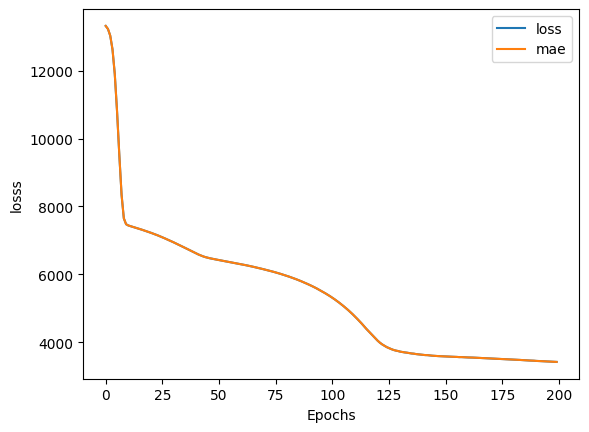

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel("losss")
plt.xlabel("Epochs")

#PreProcessing Data (Normalizaton and standardization)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'Age')

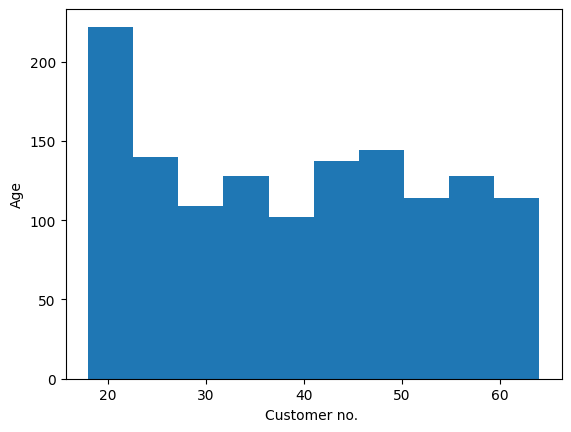

In [24]:
x["age"].plot(kind="hist")
plt.xlabel("Customer no. ")
plt.ylabel("Age")

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

x=insurance.drop("charges", axis=1)
y=insurance["charges"]

x_train,  x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
ct.fit(x_train)

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [38]:
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [40]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [43]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [45]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

<Axes: ylabel='Frequency'>

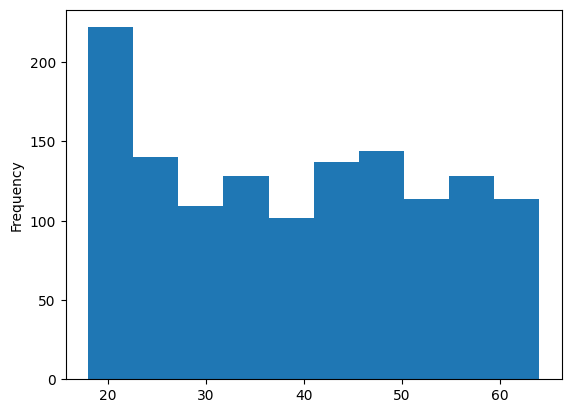

In [32]:
x["age"].plot(kind="hist")

#Our data has been normalized and one hot encoded. Now let's build a Nueral network model on it and see how it goes

In [ ]:
#Building our neural network model to fit on our nornalized data
tf.random.set_seed(42)
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

insurance_model_4.fit(x_train_normal, y_train, epochs=100)

In [54]:
#Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3410.6729 - mae: 3410.6729


[3248.191650390625, 3248.191650390625]